In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style='ticks')

In [2]:
# load train, test, and dev sets
data_x = np.load('v3_data_x.npy')
data_y = np.load('v3_data_y.npy')

In [3]:
X_data, X_test, y_data, y_test = train_test_split(data_x, data_y, test_size=0.15, random_state=7)
X_train, X_dev, y_train, y_dev = train_test_split(X_data, y_data, test_size=0.15, random_state=7)

In [4]:
# X_data.shape
# X_dev.shape
X_test.shape

(632, 135)

In [5]:
# pre-processing data: transforming each feature to have zero mean and unit variance. To avoid risk analysis
# being skewed by certain features dominating the variance.
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_dev_scaled = pd.DataFrame(scaler.transform(X_dev))

In [6]:
# Define the PCA object
pca = PCA()

x_train_pca = pca.fit_transform(X_train_scaled)

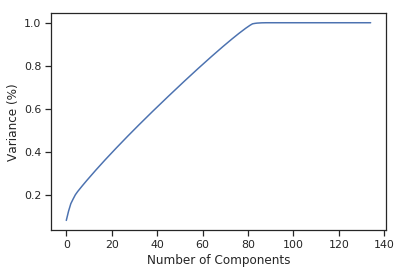

In [7]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.savefig('4_ExplainedVariance.svg', bbox_inches='tight', dpi=600)
plt.show()

In [8]:
pc_list = np.linspace(1, 135, 135, dtype='int16')
results = np.zeros((135, 3))

for i in range(len(pc_list)):
    pc = pc_list[i]
    r2score_train, mse_train= pca_tuner(pc, x_train_pca, y_train)
    results[i, 0] = pc
    results[i, 1] = mse_train
    results[i, 2] = r2score_train

df = pd.DataFrame(results)
df.columns = ['pc', 'mse train', 'r2 train']

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].scatter(df['pc'], df['mse train'])
ax[0].set_ylabel('MSE')
ax[0].set_xticklabels([])

ax[1].scatter(df['pc'], df['r2 train'], color=sns.color_palette()[1])
ax[1].set_ylabel('$R^2$ score')
ax[1].set_xlabel('Number of Components')
plt.savefig('4_PCR.svg', bbox_inches='tight', dpi=600)
plt.show()

NameError: name 'pca_tuner' is not defined